In [437]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action = 'ignore')

In [438]:
#чтение датасета с помощью библиотеки pandas
df = pd.read_csv('6games.csv')

## Предварительная обработка данных

In [439]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке
- EU_sales — продажи в Европе
- JP_sales — продажи в Японии
- Other_sales — продажи в других странах
- Critic_Score — оценка критиков
- User_Score — оценка пользователей
- Rating — рейтинг

Название столбцов нужно привести к нижнему регистру.

Наблюдаем, что в данных есть пропуски. 

Год приведем к целочисленному типу.

Оценку пользователей - к числу с плавающей запятой.

In [440]:
#оценка данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [441]:
#приведем наименования столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [442]:
#вывод названий столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [443]:
# подсчёт пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [444]:
#посмотрим на дубли
df.duplicated().sum()

0

In [445]:
#проверим количество пропусков
df['name'].isnull().sum()

2

In [446]:
#посмотрим, что это за строки
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [447]:
#считаю, что данные строки можно удалить, чтобы они не мешали дальнейшего исследования.
#полезной информации в этих строках нет.
df = df.dropna(subset=['name'])
df['name'].isnull().sum()

0

In [448]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [449]:
#проверим количество пропусков
df['platform'].isnull().sum()

0

In [450]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [451]:
#проверим количество пропусков
df['year_of_release'].isnull().sum()

269

In [452]:
#посмотрим на уникальные значения
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [453]:
df = df.dropna(subset=['year_of_release'])

In [454]:
df['year_of_release'].isnull().sum()

0

In [455]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [456]:
#проверим количество пропусков
df['na_sales'].isnull().sum()

0

In [457]:
#проверим количество пропусков
df['eu_sales'].isnull().sum()

0

In [458]:
#проверим количество пропусков
df['other_sales'].isnull().sum()

0

In [459]:
df['other_sales'].isnull().sum()

0

In [460]:
#проверим количество пропусков
df['critic_score'].isnull().sum()

8461

In [461]:
#посмотрим уникальные значения
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [462]:
#здесь пропуски можно поменять на ноль
df['critic_score'] = df['critic_score'].fillna(0)
df['critic_score'].isnull().sum()

0

In [463]:
#проверим количество пропусков
df['user_score'].isnull().sum()

6605

In [464]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [465]:
df.loc[df['user_score'] == 'tbd','user_score'] = 0
df['user_score'] = df['user_score'].fillna(0)
df['user_score'].isnull().sum()

0

In [466]:
df['user_score'] = df['user_score'].astype('float')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN


In [467]:
#проверим количество пропусков
df['rating'].isnull().sum()

6676

In [468]:
#Проверим уникальные значения
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [469]:
#заменим
df['rating'] = df['rating'].fillna('no rating')
df['rating'].unique()

array(['E', 'no rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [470]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,78.77
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,no rating,33.43
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,31.73
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.49
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,no rating,21.16


## Вывод:

- привели названия столбцов к нижнему регистру;
- данные преобразовали к нужному типу. Год поменяли на целочисленный, так как по другому быть не может. Оценку пользователя привели к числу с плавающей запятой, так как там находятся дробные числа и в таблице есть аналогичный столбец с таким типом;
- обработали пропуски
- игры без названия удалили, так как непонятно, что это за игры, а также там практически не было продаж. На общую статистику это не повлияет;
- отсутствующие значения в столбце с годом заменили на 0, так как восстановить год сложно и игра на разных платформах может быть выпущена в разное время;
- отсутствующие значения в оценках пользователей и критиков заменили на 0;
- пропуски в рейтинге заменили на значение "Нет рейтинга", так как у игр может быть различный рейтинг на различных платформах;

### Построить точечную диаграмму (матрицу диаграмм рассеяния). Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков.

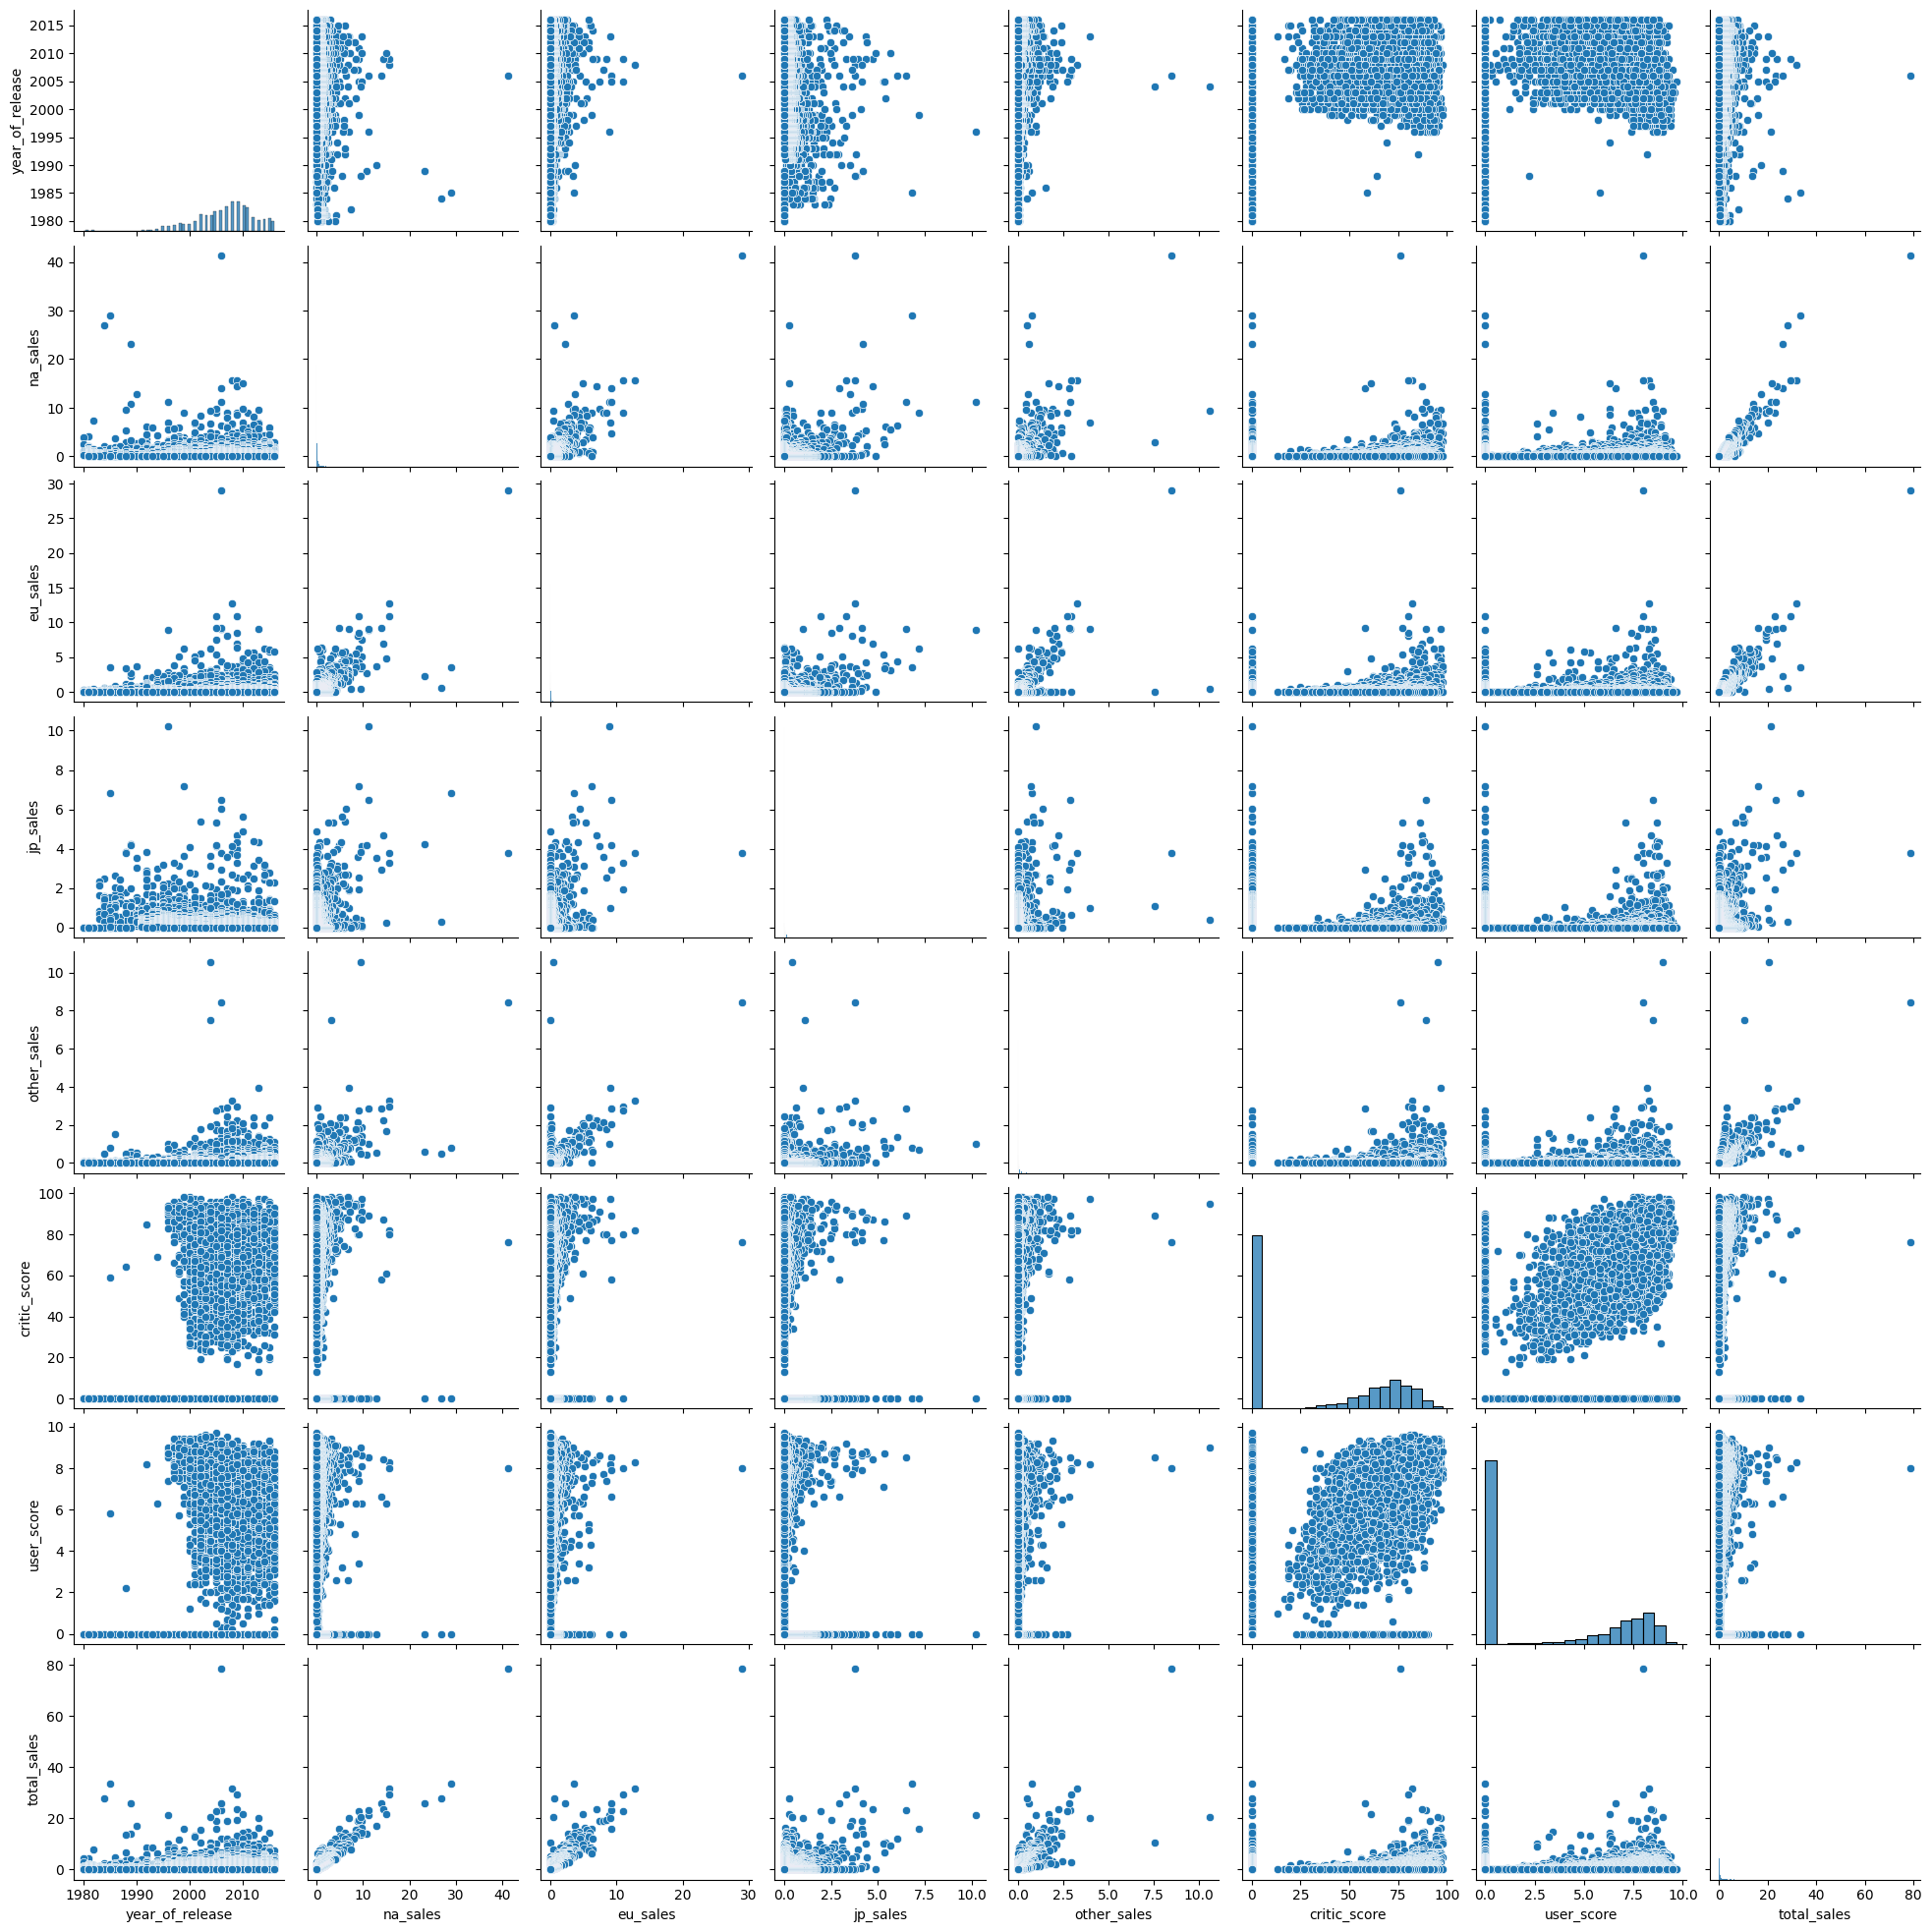

In [471]:
sns.pairplot(df)

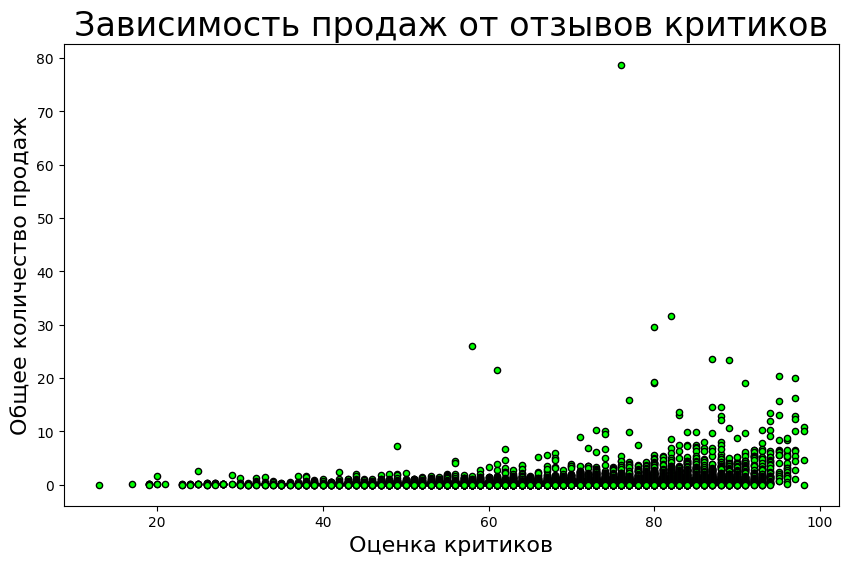

In [472]:

ps3_critical_store = df[(df['critic_score'] != 0)]
ps3_critical_store.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', color='lime', figsize=(10,6))
plt.title('Зависимость продаж от отзывов критиков', fontsize=24)
plt.xlabel('Оценка критиков', fontsize=16)
plt.ylabel('Общее количество продаж', fontsize=16)
plt.show()

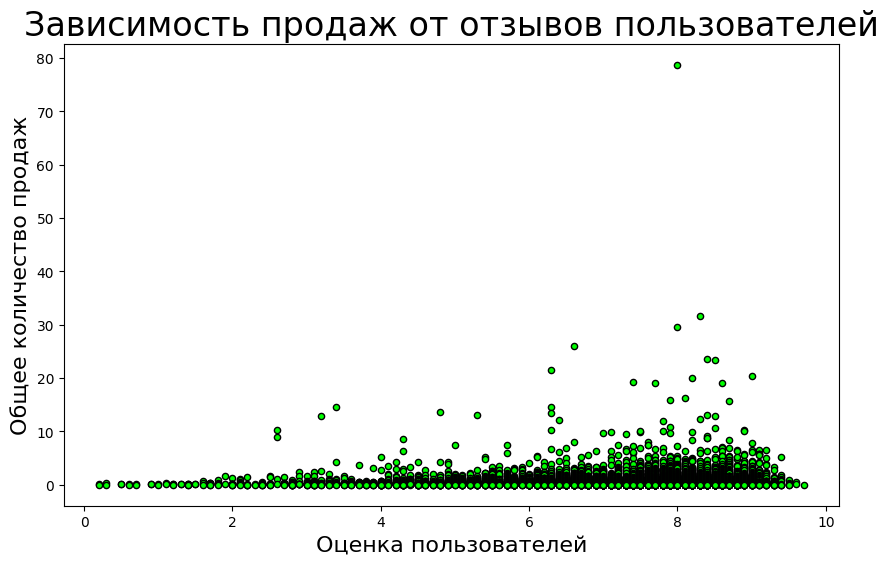

In [473]:
ps3_critical_store = df[(df['user_score'] != 0)]
ps3_critical_store.plot(kind='scatter', x='user_score', y='total_sales', ec='black', color='lime', figsize=(10,6))
plt.title('Зависимость продаж от отзывов пользователей', fontsize=24)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Общее количество продаж', fontsize=16)
plt.show()

### Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации.

In [474]:
#построим таблицу корреляции:
corr = df[['critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].corr()
corr.style.background_gradient(cmap='coolwarm')


,critic_score,na_sales,eu_sales,jp_sales,other_sales
critic_score,1.000000,0.153382,0.170641,-0.042975,0.176062
na_sales,0.153382,1.000000,0.766546,0.451162,0.638479
eu_sales,0.170641,0.766546,1.000000,0.435894,0.722679
jp_sales,-0.042975,0.451162,0.435894,1.000000,0.291562
other_sales,0.176062,0.638479,0.722679,0.291562,1.000000


### Построить heatmap (тепловую карту корреляции).

<AxesSubplot: >

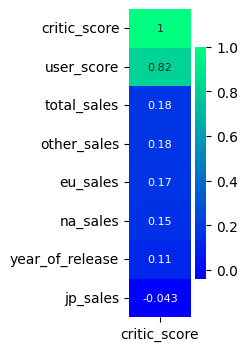

In [475]:
plt.figure(figsize=(1,4))
sns.heatmap(df.corr()[['critic_score']].sort_values(by='critic_score', ascending=False), cmap="winter", 
            annot=True, annot_kws={'size':8})

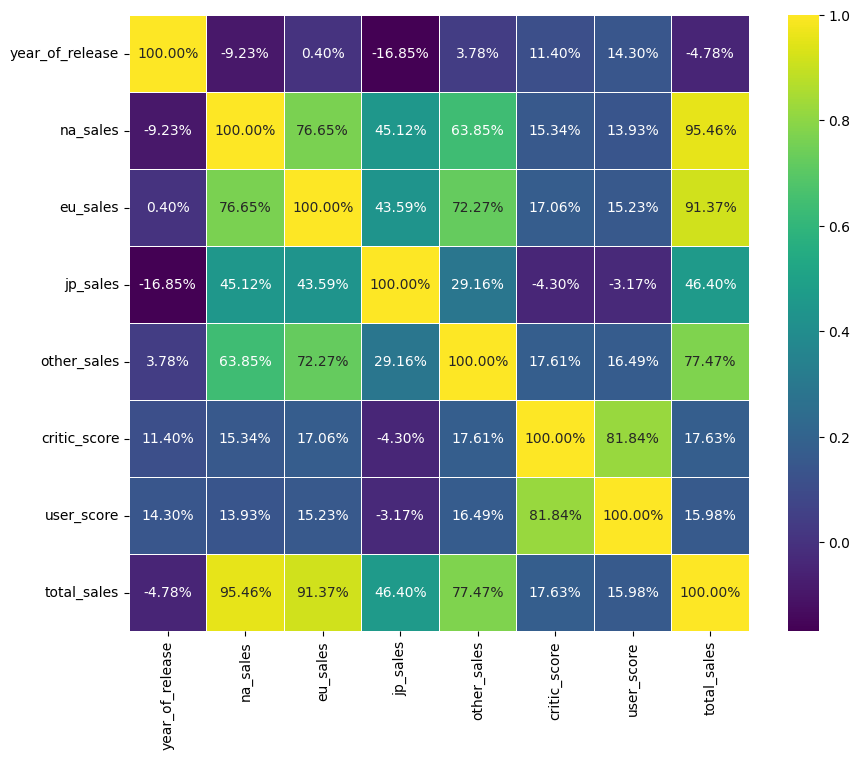

In [476]:
#Построим матрицу корреляции признаков
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap='viridis',fmt='.2%')
plt.show()